In [135]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/test.csv
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/ridge-result/sub (25).csv


# 1. train,test set을 불러오고 전처리를 위해 합치기

In [136]:
pd.options.display.max_columns = 100

train = pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv")
test = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv")

display(train.head(),test.head())

#-----------이상치 제거를 위한 추가사항-------------------
train = train.drop(train[(train["GrLivArea"] > 4000) & (train["SalePrice"] < 300000)].index)
train = train.drop(train[(train["GarageArea"] > 1200) & (train["SalePrice"] < 300000)].index)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [137]:
alldata = pd.concat([train,test], sort = False)

# description.txt에 따르면, categorical 칼럼이 numerical로 되어있으므로 타입 바꾸기
alldata["MSSubClass"] = alldata["MSSubClass"].astype(str)

alldata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


# 2. categorical column들의 처리를 위해 LabelEncoding으로 처리하기

- 레이블 인코딩(Label Encoding)은 레이블을 숫자 형태로 변환하여 기계 판독이 가능한 형태로 변환하는 것을 말한다. 
- 데이터 셋에 대한 중요한 전처리 단계

In [138]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in alldata.columns[alldata.dtypes == object]:
    alldata[i] = le.fit_transform(list(alldata[i]))

alldata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,10,3,65.0,8450,1,2,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,0,12,13,1,196.0,2,4,2,2,3,3,2,706.0,5,0.0,150.0,856.0,1,0,1,4,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,5,1,2003.0,1,2.0,548.0,4,4,2,0,61,0,0,0,0,3,4,4,0,2,2008,8,4,208500.0
1,2,5,3,80.0,9600,1,2,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,0,8,8,2,0.0,3,4,1,2,3,1,0,978.0,5,0.0,284.0,1262.0,1,0,1,4,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,4,1,1976.0,1,2.0,460.0,4,4,2,298,0,0,0,0,0,3,4,4,0,5,2007,8,4,181500.0
2,3,10,3,68.0,11250,1,2,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,0,12,13,1,162.0,2,4,2,2,3,2,2,486.0,5,0.0,434.0,920.0,1,0,1,4,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2.0,608.0,4,4,2,0,42,0,0,0,0,3,4,4,0,9,2008,8,4,223500.0
3,4,11,3,60.0,9550,1,2,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,0,13,15,2,0.0,3,4,0,3,1,3,0,216.0,5,0.0,540.0,756.0,1,2,1,4,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3.0,642.0,4,4,2,0,35,272,0,0,0,3,4,4,0,2,2006,8,0,140000.0
4,5,10,3,84.0,14260,1,2,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,0,12,13,1,350.0,2,4,2,2,3,0,2,655.0,5,0.0,490.0,1145.0,1,0,1,4,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3.0,836.0,4,4,2,192,84,0,0,0,0,3,4,4,0,12,2008,8,4,250000.0


# 3. 두 개 이상의 numerical column을 조합해 새로운 column 추가하기
- ex) 지하실의 넓이 + 지상의 넓이 = house의 전체 넓이

In [139]:
alldata["Overall_estimate"] = alldata["OverallQual"] + alldata["OverallCond"]*0.5

alldata["Overall_estimate2"] = alldata["OverallQual"] - alldata["OverallCond"]*0.5

alldata["Buliding_old"] = alldata["YrSold"] - alldata["YearBuilt"]      

alldata["total_area"] = alldata["GrLivArea"] + alldata["TotalBsmtSF"] 

alldata["final_area"] = alldata["total_area"] + alldata["GarageArea"]

alldata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Overall_estimate,Overall_estimate2,Buliding_old,total_area,final_area
0,1,10,3,65.0,8450,1,2,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,0,12,13,1,196.0,2,4,2,2,3,3,2,706.0,5,0.0,150.0,856.0,1,0,1,4,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,5,1,2003.0,1,2.0,548.0,4,4,2,0,61,0,0,0,0,3,4,4,0,2,2008,8,4,208500.0,9.5,4.5,5,2566.0,3114.0
1,2,5,3,80.0,9600,1,2,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,0,8,8,2,0.0,3,4,1,2,3,1,0,978.0,5,0.0,284.0,1262.0,1,0,1,4,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,4,1,1976.0,1,2.0,460.0,4,4,2,298,0,0,0,0,0,3,4,4,0,5,2007,8,4,181500.0,10.0,2.0,31,2524.0,2984.0
2,3,10,3,68.0,11250,1,2,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,0,12,13,1,162.0,2,4,2,2,3,2,2,486.0,5,0.0,434.0,920.0,1,0,1,4,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2.0,608.0,4,4,2,0,42,0,0,0,0,3,4,4,0,9,2008,8,4,223500.0,9.5,4.5,7,2706.0,3314.0
3,4,11,3,60.0,9550,1,2,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,0,13,15,2,0.0,3,4,0,3,1,3,0,216.0,5,0.0,540.0,756.0,1,2,1,4,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3.0,642.0,4,4,2,0,35,272,0,0,0,3,4,4,0,2,2006,8,0,140000.0,9.5,4.5,91,2473.0,3115.0
4,5,10,3,84.0,14260,1,2,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,0,12,13,1,350.0,2,4,2,2,3,0,2,655.0,5,0.0,490.0,1145.0,1,0,1,4,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3.0,836.0,4,4,2,192,84,0,0,0,0,3,4,4,0,12,2008,8,4,250000.0,10.5,5.5,8,3343.0,4179.0


# 4. categorical column과 numerical colum을 조합해 통계량 추가하기

In [140]:
nm = alldata.groupby("Neighborhood")["final_area"].mean().to_frame("Neighbor_area").reset_index()
alldata = pd.merge(alldata,nm,on="Neighborhood", how='left')

no = alldata.groupby("Neighborhood")["OverallQual"].mean().to_frame("Neighbor_qual").reset_index()
alldata = pd.merge(alldata,no,on="Neighborhood", how='left')

nl = alldata.groupby("Neighborhood")["LotFrontage"].mean().to_frame("Neighbor_lotf").reset_index()
alldata = pd.merge(alldata,nl,on="Neighborhood", how='left')

bs = alldata.groupby("BldgType")["final_area"].mean().to_frame("bldgType_area").reset_index()
alldata = pd.merge(alldata,bs,on="BldgType",how="left")

alldata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Overall_estimate,Overall_estimate2,Buliding_old,total_area,final_area,Neighbor_area,Neighbor_qual,Neighbor_lotf,bldgType_area
0,1,10,3,65.0,8450,1,2,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,0,12,13,1,196.0,2,4,2,2,3,3,2,706.0,5,0.0,150.0,856.0,1,0,1,4,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,5,1,2003.0,1,2.0,548.0,4,4,2,0,61,0,0,0,0,3,4,4,0,2,2008,8,4,208500.0,9.5,4.5,5,2566.0,3114.0,3223.295880,6.677903,71.336364,3053.900372
1,2,5,3,80.0,9600,1,2,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,0,8,8,2,0.0,3,4,1,2,3,1,0,978.0,5,0.0,284.0,1262.0,1,0,1,4,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,4,1,1976.0,1,2.0,460.0,4,4,2,298,0,0,0,0,0,3,4,4,0,5,2007,8,4,181500.0,10.0,2.0,31,2524.0,2984.0,3826.208333,7.208333,72.000000,3053.900372
2,3,10,3,68.0,11250,1,2,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,0,12,13,1,162.0,2,4,2,2,3,2,2,486.0,5,0.0,434.0,920.0,1,0,1,4,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2.0,608.0,4,4,2,0,42,0,0,0,0,3,4,4,0,9,2008,8,4,223500.0,9.5,4.5,7,2706.0,3314.0,3223.295880,6.677903,71.336364,3053.900372
3,4,11,3,60.0,9550,1,2,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,0,13,15,2,0.0,3,4,0,3,1,3,0,216.0,5,0.0,540.0,756.0,1,2,1,4,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3.0,642.0,4,4,2,0,35,272,0,0,0,3,4,4,0,2,2006,8,0,140000.0,9.5,4.5,91,2473.0,3115.0,3176.805825,6.271845,69.951807,3053.900372
4,5,10,3,84.0,14260,1,2,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,0,12,13,1,350.0,2,4,2,2,3,0,2,655.0,5,0.0,490.0,1145.0,1,0,1,4,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3.0,836.0,4,4,2,192,84,0,0,0,0,3,4,4,0,12,2008,8,4,250000.0,10.5,5.5,8,3343.0,4179.0,4636.042254,7.929577,91.629630,3053.900372


In [141]:
alldata.corr()["SalePrice"].sort_values(ascending = False)
# 정답값 과의 상관관계를 통해 추가한 통계량의 상관성 파악

SalePrice            1.000000
final_area           0.854926
total_area           0.829116
OverallQual          0.796004
Overall_estimate2    0.743536
                       ...   
Buliding_old        -0.523222
GarageFinish        -0.551386
KitchenQual         -0.592704
BsmtQual            -0.623940
ExterQual           -0.647744
Name: SalePrice, Length: 90, dtype: float64

In [142]:
alldata2 = alldata.drop(["SalePrice","Id"], axis=1)
alldata2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Overall_estimate,Overall_estimate2,Buliding_old,total_area,final_area,Neighbor_area,Neighbor_qual,Neighbor_lotf,bldgType_area
0,10,3,65.0,8450,1,2,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,0,12,13,1,196.0,2,4,2,2,3,3,2,706.0,5,0.0,150.0,856.0,1,0,1,4,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,5,1,2003.0,1,2.0,548.0,4,4,2,0,61,0,0,0,0,3,4,4,0,2,2008,8,4,9.5,4.5,5,2566.0,3114.0,3223.295880,6.677903,71.336364,3053.900372
1,5,3,80.0,9600,1,2,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,0,8,8,2,0.0,3,4,1,2,3,1,0,978.0,5,0.0,284.0,1262.0,1,0,1,4,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,4,1,1976.0,1,2.0,460.0,4,4,2,298,0,0,0,0,0,3,4,4,0,5,2007,8,4,10.0,2.0,31,2524.0,2984.0,3826.208333,7.208333,72.000000,3053.900372
2,10,3,68.0,11250,1,2,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,0,12,13,1,162.0,2,4,2,2,3,2,2,486.0,5,0.0,434.0,920.0,1,0,1,4,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2.0,608.0,4,4,2,0,42,0,0,0,0,3,4,4,0,9,2008,8,4,9.5,4.5,7,2706.0,3314.0,3223.295880,6.677903,71.336364,3053.900372
3,11,3,60.0,9550,1,2,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,0,13,15,2,0.0,3,4,0,3,1,3,0,216.0,5,0.0,540.0,756.0,1,2,1,4,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3.0,642.0,4,4,2,0,35,272,0,0,0,3,4,4,0,2,2006,8,0,9.5,4.5,91,2473.0,3115.0,3176.805825,6.271845,69.951807,3053.900372
4,10,3,84.0,14260,1,2,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,0,12,13,1,350.0,2,4,2,2,3,0,2,655.0,5,0.0,490.0,1145.0,1,0,1,4,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3.0,836.0,4,4,2,192,84,0,0,0,0,3,4,4,0,12,2008,8,4,10.5,5.5,8,3343.0,4179.0,4636.042254,7.929577,91.629630,3053.900372


In [143]:
train2 = alldata2[:len(train)]
test2 = alldata2[len(train):]

# 5. 시각화
- 통계량 추가의 근거
- 이상치 발견

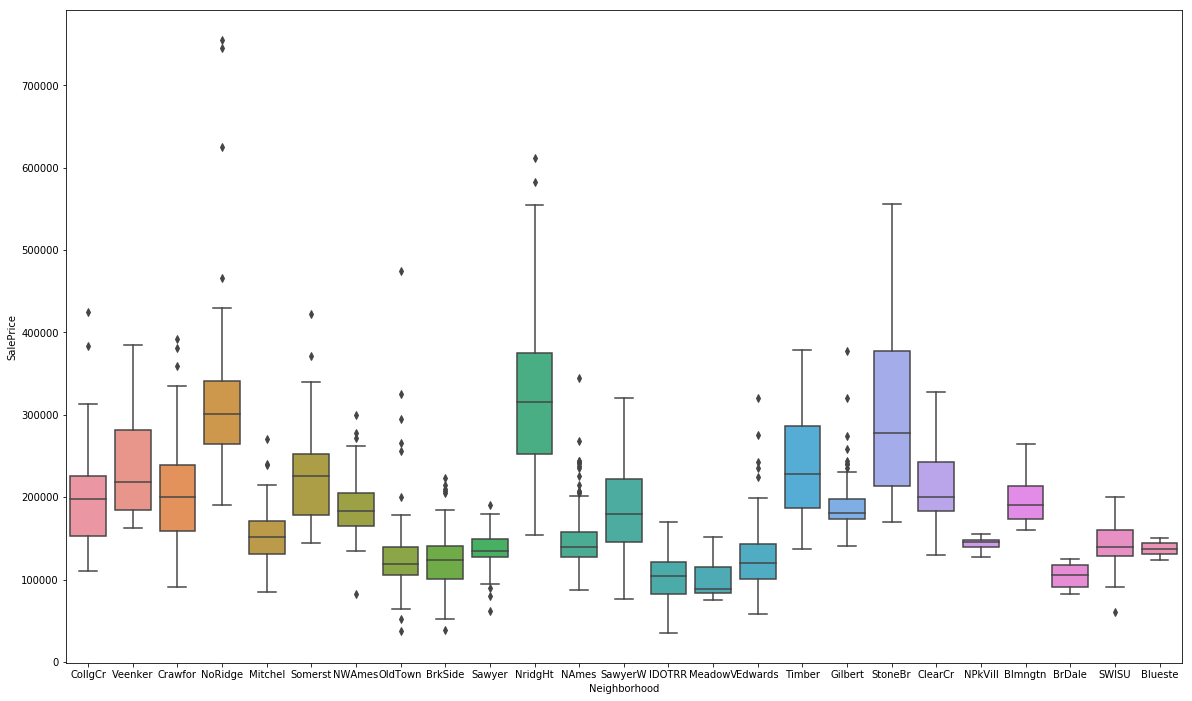

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

# 지역 별 판매가격
plt.figure(figsize=(20,12))
sns.boxplot(train["Neighborhood"],train["SalePrice"])

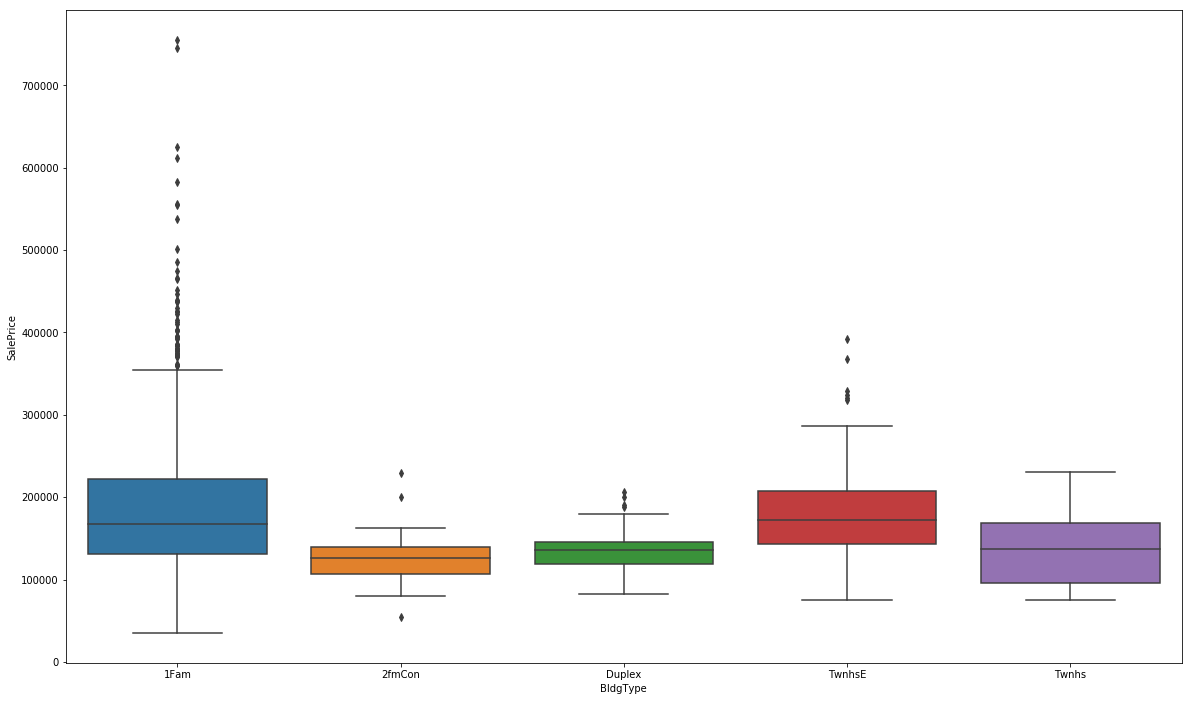

In [145]:
# type 별 가격
plt.figure(figsize=(20,12))
sns.boxplot(train["BldgType"], train["SalePrice"])

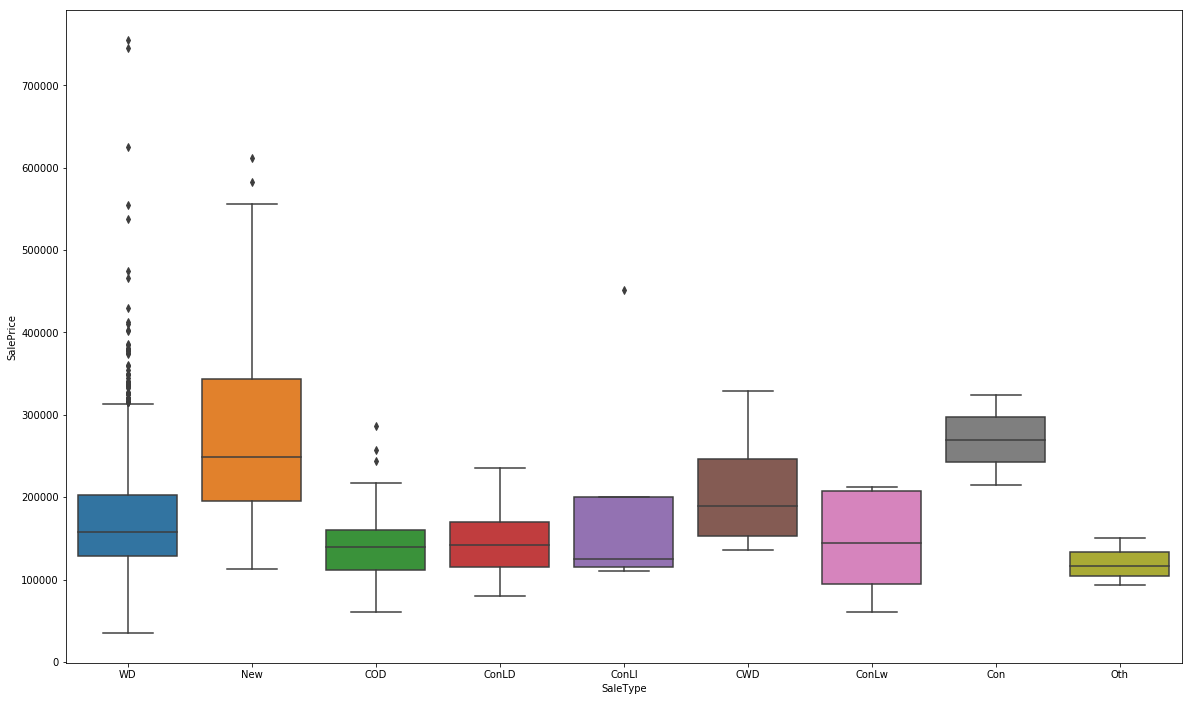

In [146]:
plt.figure(figsize=(20,12))
sns.boxplot(train["SaleType"], train["SalePrice"])

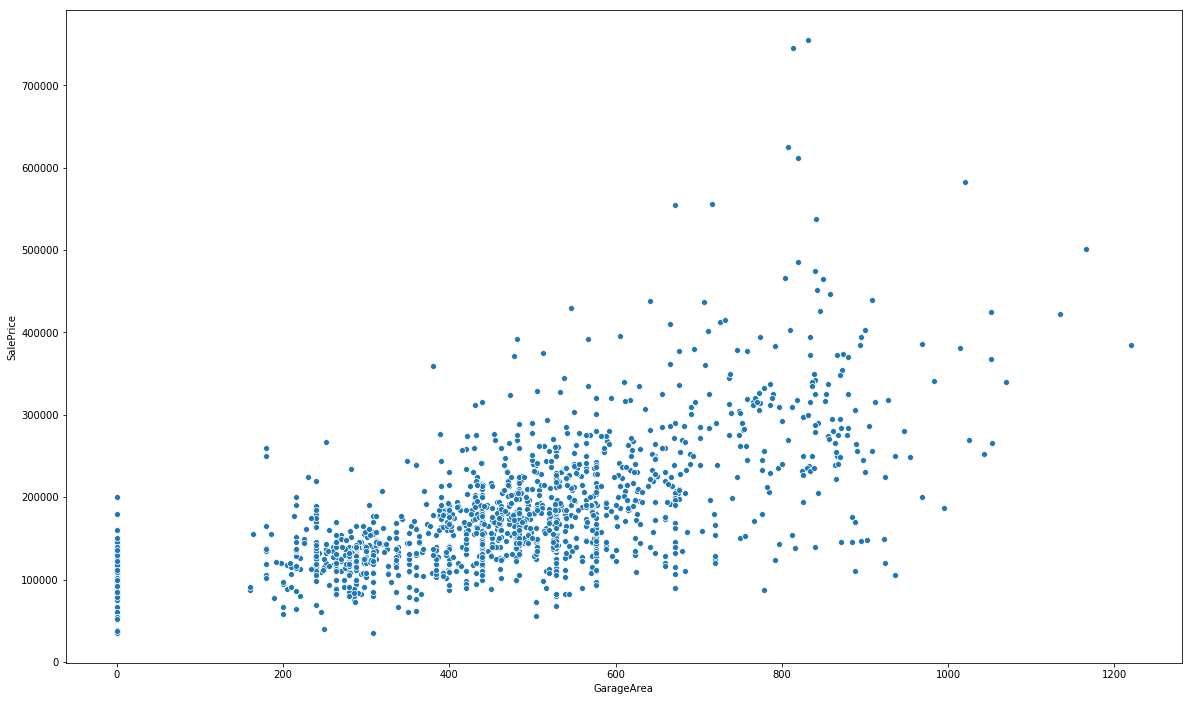

In [147]:
plt.figure(figsize=(20,12))
sns.scatterplot(train["GarageArea"],train["SalePrice"])

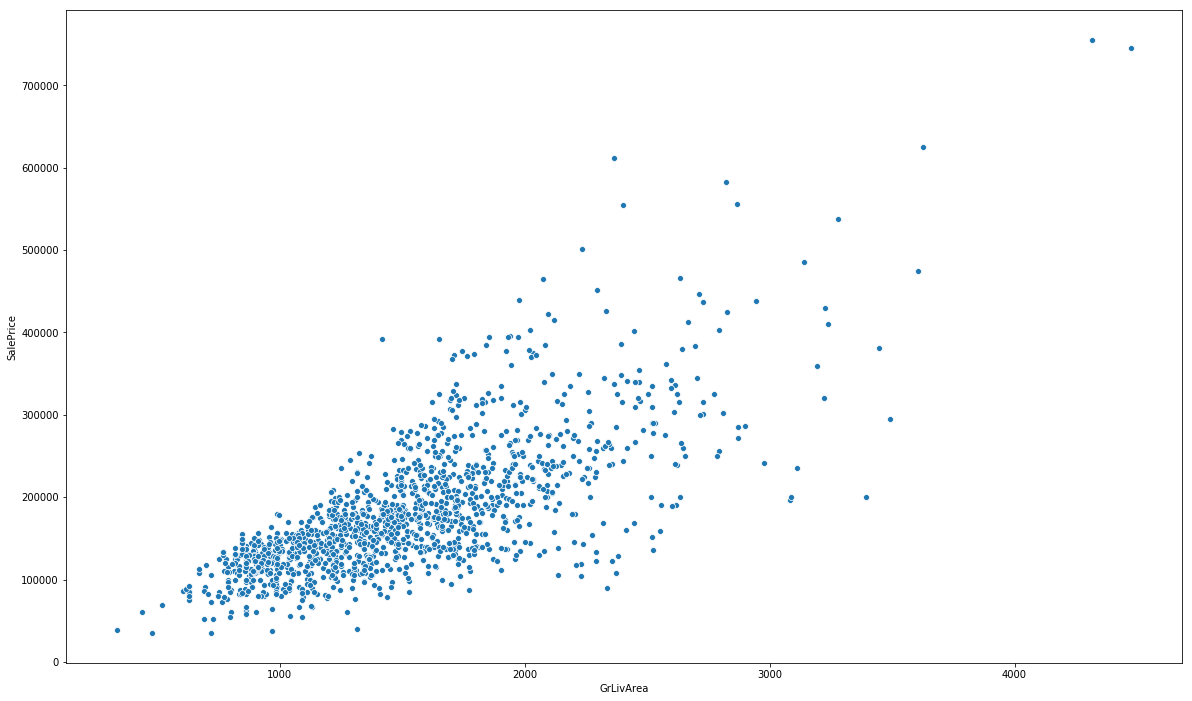

In [148]:
plt.figure(figsize=(20,12))
sns.scatterplot(train["GrLivArea"], train["SalePrice"])

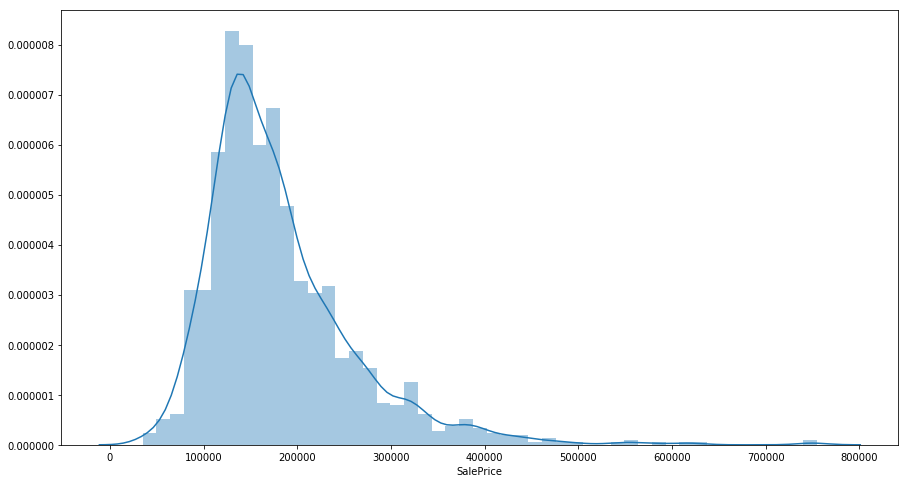

In [149]:
plt.figure(figsize=(15,8))
sns.distplot(train["SalePrice"]) 

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
alldata2 = ss.fit_transform(alldata2)

# from sklearn.preprocessing import RobustScaler
# rs = RobustScaler()
# alldata2 = rs.fit_transform(alldata2)

In [150]:
# 결측치 처리

train2 = train2.fillna(-1)
test2 = test2.fillna(-1)

# 6. 머신러닝 모델 설계
- column수가 90개로 많은 data set에서 bagging방식의 randomforest는 효과 좋지 않다.
- 최종 blending은 xgb + catboost + ridge

In [151]:
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(n_estimators = 300, random_state = 1)
# rf.fit(train2, train["SalePrice"])
# result = rf.predict(test2)

from xgboost import XGBRegressor              # score 13000대
xgb = XGBRegressor(n_estimators = 500, nthread = 4, max_depth = 6, colsample_bytree = 0.8, subsample = 0.9, learing_rate = 0.02)
xgb.fit(train2, train["SalePrice"])
result = xgb.predict(test2)

from catboost import CatBoostRegressor        # score 12780대
cat = CatBoostRegressor(iterations = 1000)
cat.fit(train2, train["SalePrice"])
result2 = cat.predict(test2)



/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[08:04:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.041724
0:	learn: 77260.7100426	total: 11.8ms	remaining: 11.8s
1:	learn: 75138.7102629	total: 16.9ms	remaining: 8.43s
2:	learn: 72956.6793604	total: 21.7ms	remaining: 7.2s
3:	learn: 71037.5079464	total: 26.2ms	remaining: 6.52s
4:	learn: 69227.9114688	total: 31.4ms	remaining: 6.24s
5:	learn: 67495.6678763	total: 36.1ms	remaining: 5.97s
6:	learn: 65765.9062513	total: 41.4ms	remaining: 5.87s
7:	learn: 64035.5338288	total: 45.6ms	remaining: 5.65s
8:	learn: 62455.7034979	total: 49.9ms	remaining: 5.49s
9:	learn: 60903.0253588	total: 55.3ms	remaining: 5.47s
10:	learn: 59472.7223559	total: 60ms	remaining: 5.39s
11:	learn: 57936.2696082	total: 64.6ms	remaining: 5.32s
12:	learn: 56579.7964019	total: 69.1ms	remaining: 5.25s
13:	learn: 55195.7830909	total: 74.6ms	remaining: 5.25s
14:	learn: 53933.0231012	total: 79.1ms	remaining: 5.19s
15:	learn: 52699

165:	learn: 16937.3927229	total: 777ms	remaining: 3.9s
166:	learn: 16894.8081432	total: 781ms	remaining: 3.9s
167:	learn: 16861.4961609	total: 786ms	remaining: 3.89s
168:	learn: 16832.1666142	total: 790ms	remaining: 3.88s
169:	learn: 16805.3315952	total: 794ms	remaining: 3.88s
170:	learn: 16768.2348896	total: 798ms	remaining: 3.87s
171:	learn: 16733.3128680	total: 803ms	remaining: 3.86s
172:	learn: 16709.6381369	total: 807ms	remaining: 3.86s
173:	learn: 16688.2314150	total: 811ms	remaining: 3.85s
174:	learn: 16650.4260244	total: 815ms	remaining: 3.84s
175:	learn: 16616.4821041	total: 820ms	remaining: 3.84s
176:	learn: 16590.7361291	total: 825ms	remaining: 3.83s
177:	learn: 16547.7463461	total: 829ms	remaining: 3.83s
178:	learn: 16519.4406535	total: 834ms	remaining: 3.82s
179:	learn: 16484.7518862	total: 838ms	remaining: 3.82s
180:	learn: 16442.8296055	total: 842ms	remaining: 3.81s
181:	learn: 16395.2228359	total: 847ms	remaining: 3.81s
182:	learn: 16360.8227812	total: 851ms	remaining: 

336:	learn: 12610.8141568	total: 1.55s	remaining: 3.04s
337:	learn: 12585.8457683	total: 1.55s	remaining: 3.04s
338:	learn: 12561.6575260	total: 1.56s	remaining: 3.04s
339:	learn: 12534.7239299	total: 1.56s	remaining: 3.03s
340:	learn: 12516.9968342	total: 1.56s	remaining: 3.02s
341:	learn: 12504.9972749	total: 1.57s	remaining: 3.02s
342:	learn: 12480.4506275	total: 1.57s	remaining: 3.01s
343:	learn: 12464.5294230	total: 1.58s	remaining: 3.01s
344:	learn: 12440.4226299	total: 1.58s	remaining: 3s
345:	learn: 12418.8388628	total: 1.58s	remaining: 3s
346:	learn: 12392.5904485	total: 1.59s	remaining: 2.99s
347:	learn: 12374.5792987	total: 1.59s	remaining: 2.99s
348:	learn: 12355.3271451	total: 1.6s	remaining: 2.98s
349:	learn: 12337.9988702	total: 1.6s	remaining: 2.98s
350:	learn: 12334.7565190	total: 1.61s	remaining: 2.97s
351:	learn: 12315.3349333	total: 1.61s	remaining: 2.97s
352:	learn: 12301.5522289	total: 1.61s	remaining: 2.96s
353:	learn: 12289.3123685	total: 1.62s	remaining: 2.95s


502:	learn: 10205.3964618	total: 2.32s	remaining: 2.29s
503:	learn: 10186.2866039	total: 2.33s	remaining: 2.29s
504:	learn: 10184.9579582	total: 2.33s	remaining: 2.28s
505:	learn: 10173.6412457	total: 2.33s	remaining: 2.28s
506:	learn: 10162.1504544	total: 2.34s	remaining: 2.27s
507:	learn: 10145.3045632	total: 2.34s	remaining: 2.27s
508:	learn: 10143.9748401	total: 2.35s	remaining: 2.26s
509:	learn: 10138.3734773	total: 2.35s	remaining: 2.26s
510:	learn: 10121.2146142	total: 2.35s	remaining: 2.25s
511:	learn: 10114.5383606	total: 2.36s	remaining: 2.25s
512:	learn: 10098.1131895	total: 2.36s	remaining: 2.24s
513:	learn: 10091.0144783	total: 2.37s	remaining: 2.24s
514:	learn: 10072.3826780	total: 2.37s	remaining: 2.23s
515:	learn: 10071.5572009	total: 2.38s	remaining: 2.23s
516:	learn: 10061.5003170	total: 2.39s	remaining: 2.23s
517:	learn: 10046.4384123	total: 2.39s	remaining: 2.23s
518:	learn: 10030.7017106	total: 2.4s	remaining: 2.22s
519:	learn: 10016.2268395	total: 2.4s	remaining: 

675:	learn: 8439.1211131	total: 3.09s	remaining: 1.48s
676:	learn: 8428.4346978	total: 3.09s	remaining: 1.48s
677:	learn: 8417.5631119	total: 3.1s	remaining: 1.47s
678:	learn: 8404.3528352	total: 3.1s	remaining: 1.47s
679:	learn: 8394.7186074	total: 3.11s	remaining: 1.46s
680:	learn: 8382.1572469	total: 3.11s	remaining: 1.46s
681:	learn: 8377.8916924	total: 3.12s	remaining: 1.45s
682:	learn: 8373.2269234	total: 3.12s	remaining: 1.45s
683:	learn: 8361.4840987	total: 3.13s	remaining: 1.44s
684:	learn: 8358.1882968	total: 3.13s	remaining: 1.44s
685:	learn: 8357.7384660	total: 3.13s	remaining: 1.43s
686:	learn: 8348.4305706	total: 3.14s	remaining: 1.43s
687:	learn: 8345.1311030	total: 3.14s	remaining: 1.43s
688:	learn: 8333.3633358	total: 3.15s	remaining: 1.42s
689:	learn: 8319.2186480	total: 3.15s	remaining: 1.42s
690:	learn: 8310.3975530	total: 3.16s	remaining: 1.41s
691:	learn: 8302.6800273	total: 3.16s	remaining: 1.41s
692:	learn: 8294.1080758	total: 3.17s	remaining: 1.4s
693:	learn: 8

843:	learn: 7107.9254762	total: 3.86s	remaining: 713ms
844:	learn: 7100.3493456	total: 3.86s	remaining: 709ms
845:	learn: 7095.6571447	total: 3.87s	remaining: 704ms
846:	learn: 7087.8979511	total: 3.87s	remaining: 700ms
847:	learn: 7081.6306317	total: 3.88s	remaining: 695ms
848:	learn: 7073.8277169	total: 3.88s	remaining: 690ms
849:	learn: 7073.1599286	total: 3.88s	remaining: 686ms
850:	learn: 7063.7185623	total: 3.89s	remaining: 681ms
851:	learn: 7057.2962203	total: 3.89s	remaining: 676ms
852:	learn: 7042.5039147	total: 3.9s	remaining: 672ms
853:	learn: 7036.7779800	total: 3.9s	remaining: 667ms
854:	learn: 7031.5064287	total: 3.91s	remaining: 663ms
855:	learn: 7030.9110462	total: 3.91s	remaining: 658ms
856:	learn: 7025.4251155	total: 3.92s	remaining: 654ms
857:	learn: 7016.4520851	total: 3.92s	remaining: 649ms
858:	learn: 7008.1137950	total: 3.93s	remaining: 645ms
859:	learn: 6997.6716736	total: 3.93s	remaining: 640ms
860:	learn: 6989.3030811	total: 3.94s	remaining: 635ms
861:	learn: 

In [152]:
# 학습변수중요도
pd.Series(cat.feature_importances_, index=train2.columns).sort_values(ascending = False)[:30]

final_area           20.448213
total_area           10.159135
OverallQual           6.911891
Overall_estimate      6.882942
Neighbor_qual         3.417848
GrLivArea             2.924984
BsmtFinSF1            2.819203
TotalBsmtSF           2.673110
Buliding_old          2.534614
LotArea               2.453409
YearBuilt             1.838157
GarageType            1.715638
Neighbor_area         1.567789
2ndFlrSF              1.533700
BsmtQual              1.528504
KitchenQual           1.481237
FireplaceQu           1.459769
ExterQual             1.362315
GarageFinish          1.352533
Overall_estimate2     1.352267
YearRemodAdd          1.205320
GarageCars            1.137273
BsmtExposure          1.098934
BsmtUnfSF             1.096378
TotRmsAbvGrd          1.094064
HalfBath              1.071706
SaleCondition         1.027282
GarageYrBlt           1.013780
OverallCond           0.953676
Fireplaces            0.930737
dtype: float64

In [153]:
sub = pd.read_csv("/kaggle/input/home-data-for-ml-course/sample_submission.csv")
sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [154]:
# 다른 notebook에서 설계한 선형모델의 결과값, score = 13500대
result3 = pd.read_csv("/kaggle/input/ridge-result/sub (25).csv")
result3

,Id,SalePrice
0,1461,120810.809083
1,1462,160894.395608
2,1463,180673.524289
3,1464,198578.440595
4,1465,195455.711348
...,...,...
1454,2915,84259.386322
1455,2916,84200.384516
1456,2917,164919.605103
1457,2918,113803.725109


In [159]:
#sub["SalePrice"] = result

sub["SalePrice"] = ( result + result2 + result3["SalePrice"] )/3
sub.head()

,Id,SalePrice
0,1461,126802.612660
1,1462,157885.146636
2,1463,187916.070580
3,1464,196300.755534
4,1465,190195.321405


In [160]:
sub.to_csv("sub.csv", index = False)

# 최종score : 12264.21799
